In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [94]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.shape

(13320, 9)

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
for col in df.columns:
    print(df[col].value_counts(dropna = False))
    print('-'*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64
------------------------------
2 

In [8]:
df.drop(columns = ['area_type','availability','society', 'balcony'], inplace = True)

In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
df['location']=df['location'].fillna('Sarjapur Road')

In [13]:
df['size'].value_counts(dropna = False)

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
NaN             16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
19 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
df['size'].fillna(df['size'].mode()[0], inplace = True)

In [15]:
df['bath'].value_counts(dropna = False)

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
NaN       73
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [16]:
df['bath'].fillna(df['bath'].median(), inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [19]:
df[df['bhk'] >=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def total_sqft_convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df['total_sqft'] = df['total_sqft'].apply(total_sqft_convert_range)

In [23]:
df.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
# Price Per Square Feet

In [25]:
df['price_per_sqft']  = 100000 * df['price'] / df['total_sqft']

In [26]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [29]:
df['location'] = df['location'].apply(lambda x : x.strip())

In [30]:
location_count = df['location'].value_counts()

location_count_less_than_10 = location_count[location_count <= 10]

location_count_less_than_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [31]:
df['location'] = df['location'].apply(lambda x : 'other' if x in location_count_less_than_10 else x)

In [32]:
df['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

# Outliers

In [33]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [35]:
df = df[((df['total_sqft']/df['bhk']) >= 300)]

In [36]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
def remove_outliers_in_sqft(data):
    df_output =  pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gendf = subdf[(subdf['price_per_sqft'] > (m-st))& (subdf['price_per_sqft'] <= (m+st))]
        df_output = pd.concat([df_output,gendf],ignore_index = True)
    return df_output

In [38]:
df = remove_outliers_in_sqft(df)

In [39]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [40]:
def remove_outliers_in_bhk(data):
    exclude_indices = np.array([])
    for location,location_data in data.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_data in location_data.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_data['price_per_sqft']),
                'std' : np.std(bhk_data['price_per_sqft']),
                'count': bhk_data.shape[0]
            }
        for bhk,bhk_data in location_data.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_data[bhk_data['price_per_sqft']< (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis = 'index')

In [41]:
df = remove_outliers_in_bhk(df)

In [42]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7361.000000,7361.000000,7361.000000,7361.000000,7361.000000
mean,1496.942529,2.448173,99.093113,2.500611,6127.640136
std,865.781990,1.011515,93.336841,0.929312,2408.997210
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1096.000000,2.000000,50.000000,2.000000,4600.000000
50%,1260.000000,2.000000,73.200000,2.000000,5680.000000
75%,1680.000000,3.000000,113.000000,3.000000,6896.551724
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


In [43]:
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [44]:
df.drop(columns = ['size', 'price_per_sqft'], inplace = True)

# Clean Data

In [45]:
df.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [46]:
X = df.drop(columns = ['price'])
y = df['price']

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Applying Linear Regression

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [49]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


In [50]:
col_trans = make_column_transformer((OneHotEncoder(sparse = False),
                                ['location']),
                               remainder = 'passthrough')

In [51]:
scaler = StandardScaler()
lr = LinearRegression()

In [52]:
pipe = make_pipeline(col_trans,scaler,lr)

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [54]:
y_pred_lr = pipe.predict(X_test)

In [55]:
r2_score(y_test,y_pred_lr)

0.8233319198743454

# Applying Lasso

In [56]:
lasso = Lasso()

In [57]:
pipe_lasso = make_pipeline(col_trans,scaler,lasso)

In [58]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [59]:
y_pred_lasso = pipe_lasso.predict(X_test)

In [60]:
r2_score(y_test,y_pred_lasso)

0.8128285650772719

# Applying Ridge

In [61]:
ridge = Ridge()

In [62]:
pipe_ridge = make_pipeline(col_trans,scaler,ridge)

In [63]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [64]:
y_pred_ridge = pipe_ridge.predict(X_test)

In [65]:
r2_score(y_test,y_pred_ridge)

0.82341466333127

# Random Forest Regressor

In [66]:
rm = RandomForestRegressor(n_estimators=100, random_state=0)

In [67]:
pipe_rf = make_pipeline(col_trans,scaler, rm)

In [68]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [69]:
y_pred_rf = pipe_rf.predict(X_test)

In [70]:
r2_score(y_test,y_pred_rf)

0.7931267771952556

# Random Forest Regressor using GridSearchCV

In [71]:
col_trans = make_column_transformer((OneHotEncoder(),
                                ['location']),
                               remainder = 'passthrough')
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices

In [72]:
rf_grid_search = RandomForestRegressor(random_state=42)

In [73]:
pipe_rf_grid = make_pipeline(col_trans,scaler, rf_grid_search)

In [74]:
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],    # Number of trees in the forest
    'randomforestregressor__max_depth': [None, 10, 20],        # Maximum depth of the trees
    'randomforestregressor__min_samples_split': [2, 5, 10]     # Minimum number of samples required to split an internal node
}


In [75]:
grid_search = GridSearchCV(estimator= pipe_rf_grid, param_grid = param_grid, cv=5, scoring='r2')

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['location'])])),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'randomforestregressor__max_depth': [None, 10, 20],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                     

In [77]:
best_rf_model = grid_search.best_estimator_

In [78]:
y_pred_rf_grid_search = best_rf_model.predict(X_test)

In [79]:
print("Best Model R-squared Score:", r2_score(y_test, y_pred_rf_grid_search))
print("Best Model Parameters:", grid_search.best_params_)

Best Model R-squared Score: 0.8050910988172337
Best Model Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 300}


# Results

In [80]:
print('No Reularization : ', r2_score(y_test,y_pred_lr))
print('-_'*20)
print('Lasso Reularization : ', r2_score(y_test,y_pred_lasso))
print('-_'*20)
print('Ridge Reularization : ' , r2_score(y_test,y_pred_ridge))
print('-_'*20)
print('Random Forest Regressor : ', r2_score(y_test,y_pred_rf))
print('-_'*20)
print("Random Forest Regressor using GridSearchCV : ", r2_score(y_test, y_pred_rf_grid_search))

No Reularization :  0.8233319198743454
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Lasso Reularization :  0.8128285650772719
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Ridge Reularization :  0.82341466333127
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Random Forest Regressor :  0.7931267771952556
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Random Forest Regressor using GridSearchCV :  0.8050910988172337


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


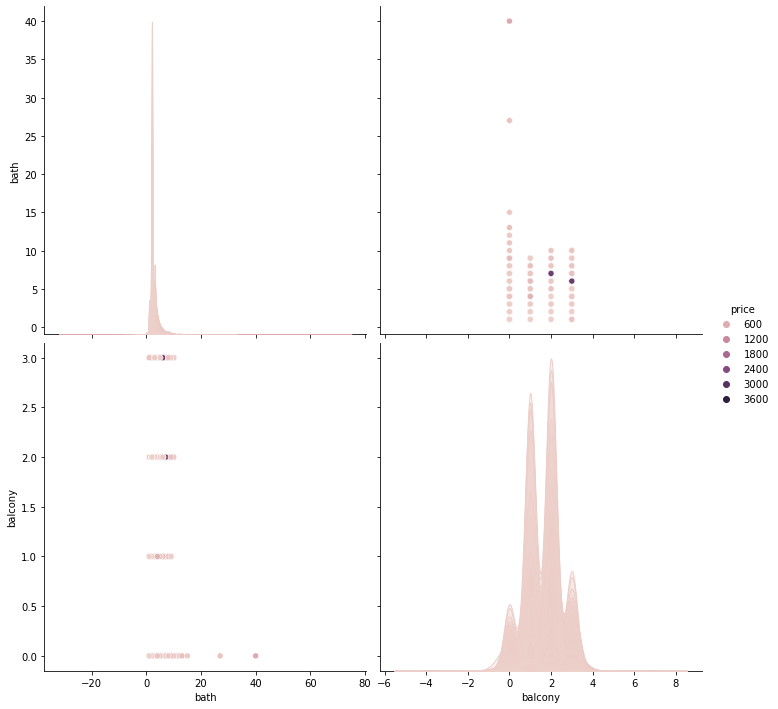

In [100]:

sns.pairplot(df,hue="price",size=5);
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


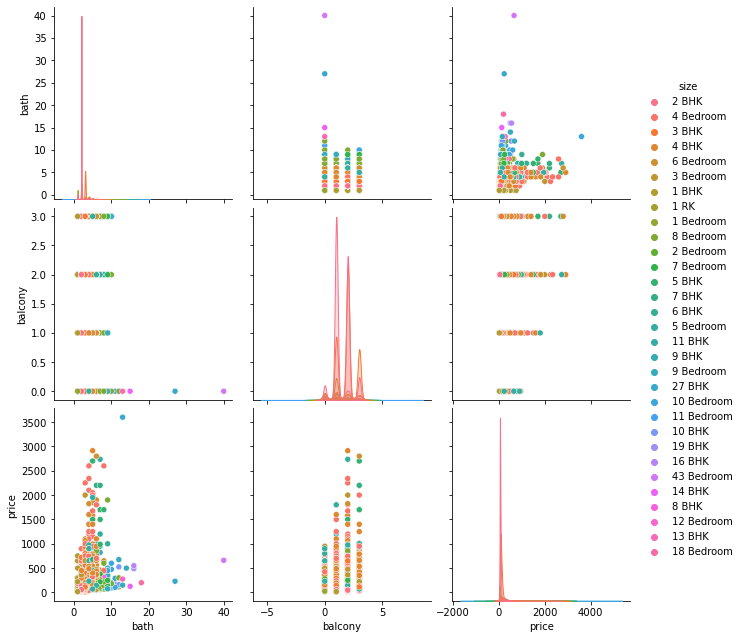

In [99]:

sns.pairplot(df,hue="size",size=3);
plt.show()

<AxesSubplot:xlabel='price', ylabel='area_type'>

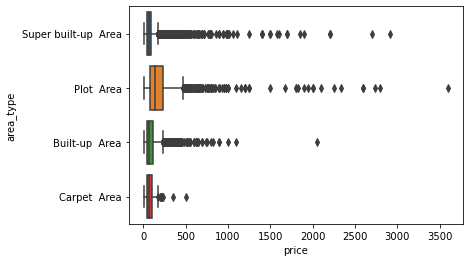

In [97]:
sns.boxplot(x='price',y='area_type',data=df)

<AxesSubplot:xlabel='price', ylabel='size'>

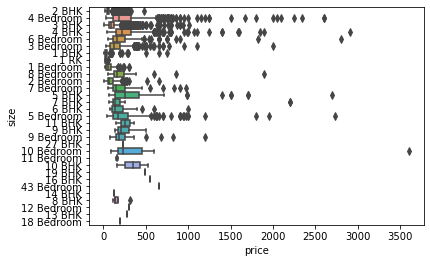

In [98]:
sns.boxplot(x='price',y='size',data=df)

<AxesSubplot:xlabel='bath', ylabel='price'>

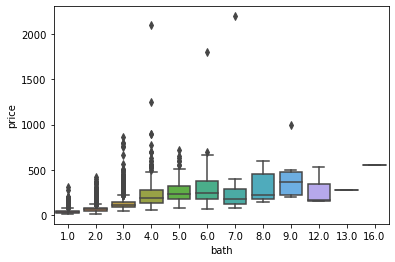

In [92]:
sns.boxplot(x='bath',y='price',data=df)